# Chapter 1

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The Bin

Here I will study the Hoeffding Inequality using the bin example.

There is a bin with a large amount of marbles that can be either red or green. Taking samples, I will infer the ratio, or the probability of picking a red marble ($\mu$).

Hoeffding Inequality for this problem:

$$ P[|\nu - \mu | > \epsilon] \leq  2 e^{-2 \epsilon ^ 2 N} $$

Where $\nu$ is the ratio of the sample 

# Checking the inequality

### Varying N
On $\epsilon = 0.05$ and $\mu = 0.8$ and taking 1000 samples of each N

1 if red 0 if green

In [2]:
np.random.seed(21938217)
mu = 0.8
eps = 0.05

In [3]:
wrong_ratio = []
for N in range(2, 500):
    wrong = []
    for i in range(1000):
        sample = []
        for n in range(N):
            a = np.random.rand()
            if a < mu:
                sample.append(1)
            else:
                sample.append(0)
        nu = np.mean(sample)
        if abs(nu - mu) > eps:
            wrong.append(1)
        else:
            wrong.append(0)
    wrong_ratio.append(np.mean(wrong))    

In [4]:
def right_term(N, eps):
    return 2*np.exp(-2*eps**2*N)

In [5]:
theorical = []
for N in range(2, 500):
    theorical.append(right_term(N,eps))

In [6]:
x = list(range(2,500))

Text(0.5,0,'Marbles per sample')

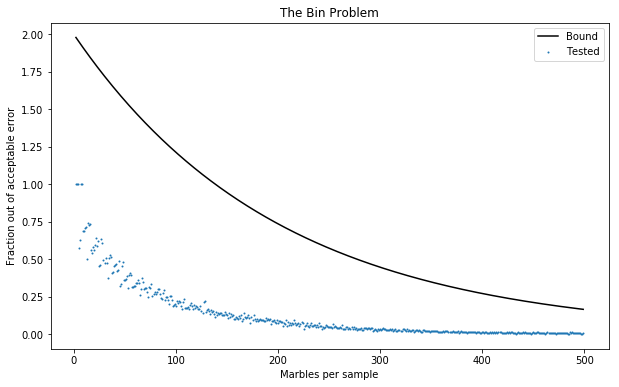

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6), frameon=False)
ax1.scatter(x, wrong_ratio, label='Tested', s=1)
ax1.plot(x, theorical, color='black', label='Bound')
ax1.legend()
ax1.set_title('The Bin Problem')
ax1.set_ylabel('Fraction out of acceptable error')
ax1.set_xlabel('Marbles per sample')

### Varying $\epsilon$
On $N = 500$ and $\mu = 0.8$ and taking 1000 samples of each N

In [8]:
N = 500

In [10]:
wrong_ratio = []
for eps10000 in range(1, 1001, 2):
    eps = eps10000/10000
    wrong = []
    for i in range(1000):
        sample = []
        for n in range(N):
            a = np.random.rand()
            if a < mu:
                sample.append(1)
            else:
                sample.append(0)
        nu = np.mean(sample)
        if abs(nu - mu) > eps:
            wrong.append(1)
        else:
            wrong.append(0)
    wrong_ratio.append(np.mean(wrong))    

In [14]:
theorical = []
for eps10000 in range(1, 1001, 2):
    eps = eps10000/10000
    theorical.append(right_term(N,eps))

In [15]:
x = list(range(1, 1001, 2))
x = [float(i)/10000 for i in x]

Text(0.5,0,'Acceptable error per sample')

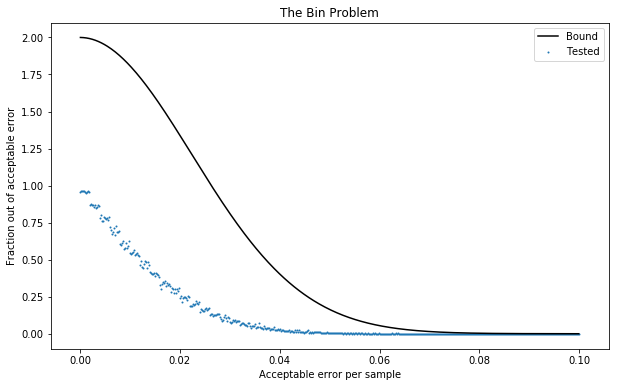

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6), frameon=False)
ax1.scatter(x, wrong_ratio, label='Tested', s=1)
ax1.plot(x, theorical, color='black', label='Bound')
ax1.legend()
ax1.set_title('The Bin Problem')
ax1.set_ylabel('Fraction out of acceptable error')
ax1.set_xlabel('Acceptable error per sample')